### Student Information
Name: 林雨慶

Student ID: 111033624

GitHub ID: tomqwrtyu

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip) by right-clicking it and open as a new tab. The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

## Part 1

In [184]:
### Begin Assignment Here
import nltk
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.preprocessing import binarize
from sklearn.feature_extraction.text import CountVectorizer
# my functions
import helpers.data_mining_helpers as dmh
%load_ext autoreload
# TEST necessary for when working with external scripts
%autoreload 2
%matplotlib inline

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

X_sample = X.sample(n=1000) #random state

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [185]:
#Answer here
X.loc[lambda x: x['category'] == 1, :]
#X['category'].loc[lambda s: s == 1]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics,"[From, :, amjad, @, eng.umd.edu, (, Amjad, A, ...","[0, 1, 0, 0]"
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics,"[From, :, sloan, @, cis.uab.edu, (, Kenneth, S...","[0, 1, 0, 0]"
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics,"[From, :, Mike_Peredo, @, mindlink.bc.ca, (, M...","[0, 1, 0, 0]"
...,...,...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics,"[From, :, lipman, @, oasys.dt.navy.mil, (, Rob...","[0, 1, 0, 0]"
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics,"[From, :, dkusswur, @, falcon.depaul.edu, (, D...","[0, 1, 0, 0]"
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics,"[From, :, dls, @, aeg.dsto.gov.au, (, David, S...","[0, 1, 0, 0]"
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics,"[From, :, Sean, McMains, <, mcmains, @, unt.ed...","[0, 1, 0, 0]"


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [186]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [187]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [188]:
# Answer here
# A string object is not considered as a missing value.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [189]:
# Answer here
print(X[0:10])
print(X.shape)
#Nothing change 都好像沒有變 有變才奇怪... sampling不應該影響到原資料

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From,

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot: title={'center': 'Category distribution'}>

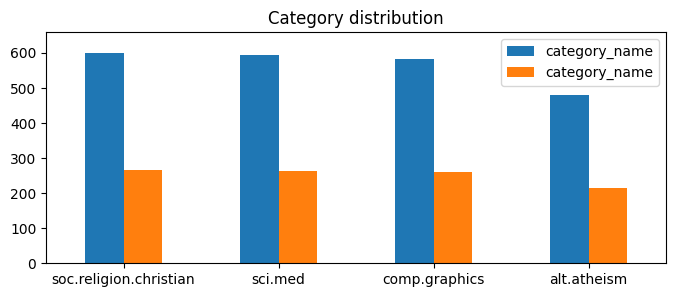

In [190]:
# Answer here
vcx = X.category_name.value_counts()
vcxs = X_sample.category_name.value_counts()
ylim = [0, max(vcx.values) * 1.1]
combined = pd.concat([vcx, vcxs], axis= 1)
combined.plot(kind = 'bar',
                title = 'Category distribution',
                ylim = ylim,        
                rot = 0, fontsize = 10, figsize = (8,3))

### **Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [191]:
# Answer here

index = [ind for ind, x in enumerate(X_counts[4:5, 0:100].toarray().flatten()) if x == 1 and ind != 0]
count_vect.get_feature_names_out()[index]

array(['01'], dtype=object)

### **Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [192]:
# Answer here
arr = X_counts.toarray()
rowsums = []
colsums = [0] * arr.shape[1]

for i in range(arr.shape[0]):
    n = 0
    for j in range(arr.shape[1]):
        n += arr[i][j]
        colsums[j] += arr[i][j]
            
    rowsums.append(n)
        

In [193]:
colsums_with_index = sorted([[index, freq] for index, freq in enumerate(colsums)], key = lambda x: x[1], reverse=True)
rowsums_with_index = sorted([[index, numTerms] for index, numTerms in enumerate(rowsums)], key = lambda x: x[1], reverse=True)

In [194]:
names = count_vect.get_feature_names_out()
termsName = [names[id] for id, x in colsums_with_index[:50]] #top 50 terms used
indexs = [id for id, x in rowsums_with_index[:50]] #top 50 text using most terms

plot_z = np.zeros((50, 50))
maxNum = None
for i in range(plot_z.shape[0]):
    for j in range(plot_z.shape[1]):
        plot_z[i][j] = X_counts[indexs[i], colsums_with_index[j][0]]
        if maxNum == None or plot_z[i][j] > maxNum:
            maxNum = plot_z[i][j]

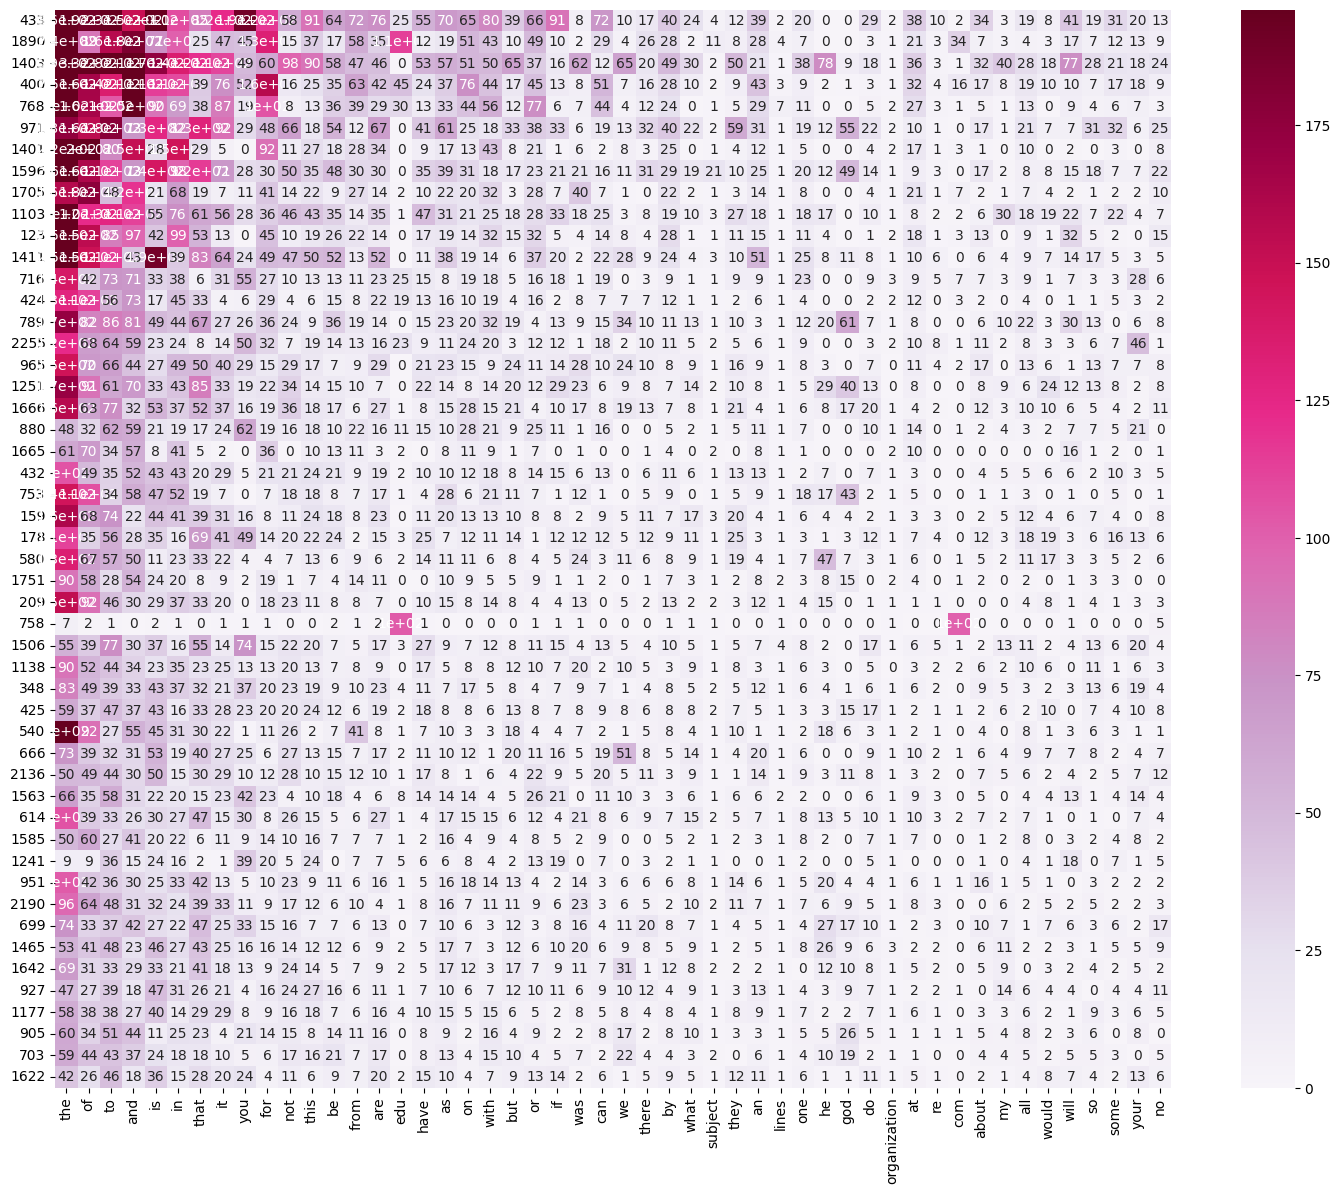

In [195]:
df_todraw = pd.DataFrame(plot_z, columns = termsName, index = indexs)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=maxNum // 3, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [196]:
# Answer here
# 我發現outlier很少
import plotly_express as px
col = ['coral', 'blue', 'black', 'orange']
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

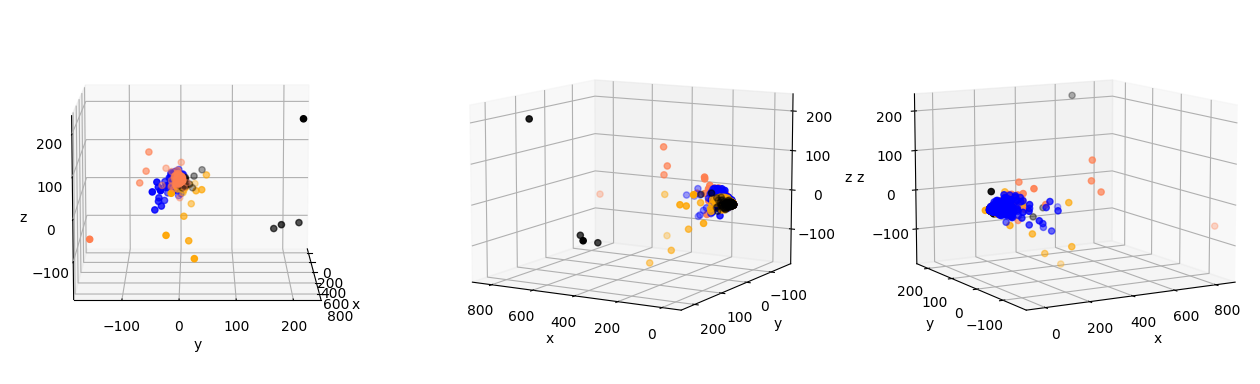

In [197]:
fig = plt.figure(figsize=plt.figaspect(0.3))

for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
        
    ax.view_init(elev=10, azim=i * 120)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [198]:
# Answer here
import plotly_express as px
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
names = count_vect.get_feature_names_out()

In [199]:
df_freq = pd.DataFrame(term_frequencies[:300], columns = ['freq'])
fig = px.bar(df_freq, x=names[:300], y='freq')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [200]:
# Answer here
def select(L, j): #algorithm to select k-largest element in O(n) time.
    if len(L) < 10:
        L.sort()
        return L[j]
    S = []
    lIndex = 0
    while lIndex + 5 < len(L) - 1: #chop into sublists which contains at most 5 element
        S.append(L[lIndex:lIndex + 5])
        lIndex += 5 
    S.append(L[lIndex:])
    Meds = []
    for subList in S:
        Meds.append(select(subList, len(subList) // 2))
    med = select(Meds, len(Meds) // 2)
    L1 = []
    L2 = []
    L3 = []
    for i in L:
        if i < med:
            L1.append(i)
        elif i > med:
            L3.append(i)
        else:
            L2.append(i)
    if j < len(L1):
        return select(L1, j)
    elif j < len(L2) + len(L1):
        return L2[0]
    else:
        return select(L3, j-len(L1)-len(L2))

In [201]:
tf = term_frequencies.tolist()
medFreq = select(tf, 99 * len(tf) // 100) # find the lowest bound of frequencies in top 1%
temp = [[index, freq] for index, freq in enumerate(tf) if freq > medFreq] # filtering
top1_term_frequencies = np.array([x[1] for x in temp])
top1_term_names = np.array([names[x[0]] for x in temp])

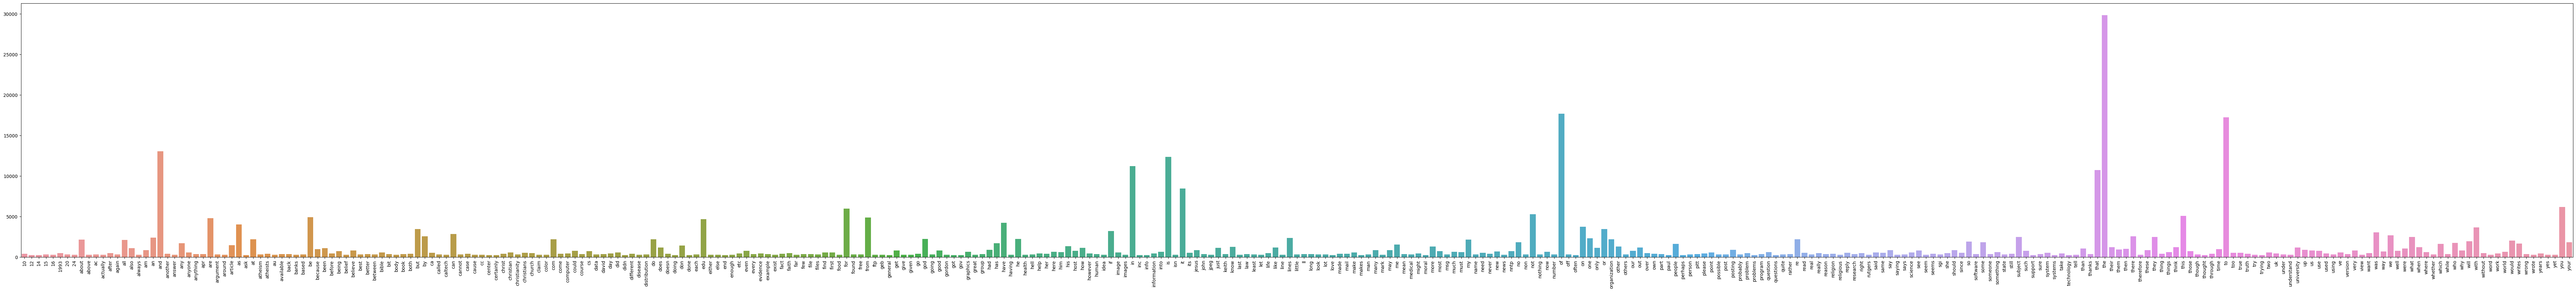

In [202]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=top1_term_names, 
            y=top1_term_frequencies)
g.set_xticklabels(top1_term_names, rotation = 90)
pass

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [203]:
# Answer here
temp = sorted([[index, freq] for index, freq in enumerate(tf)], key = lambda x:x[1], reverse=True)
sorted_term_freq = np.array([x[1] for x in temp])

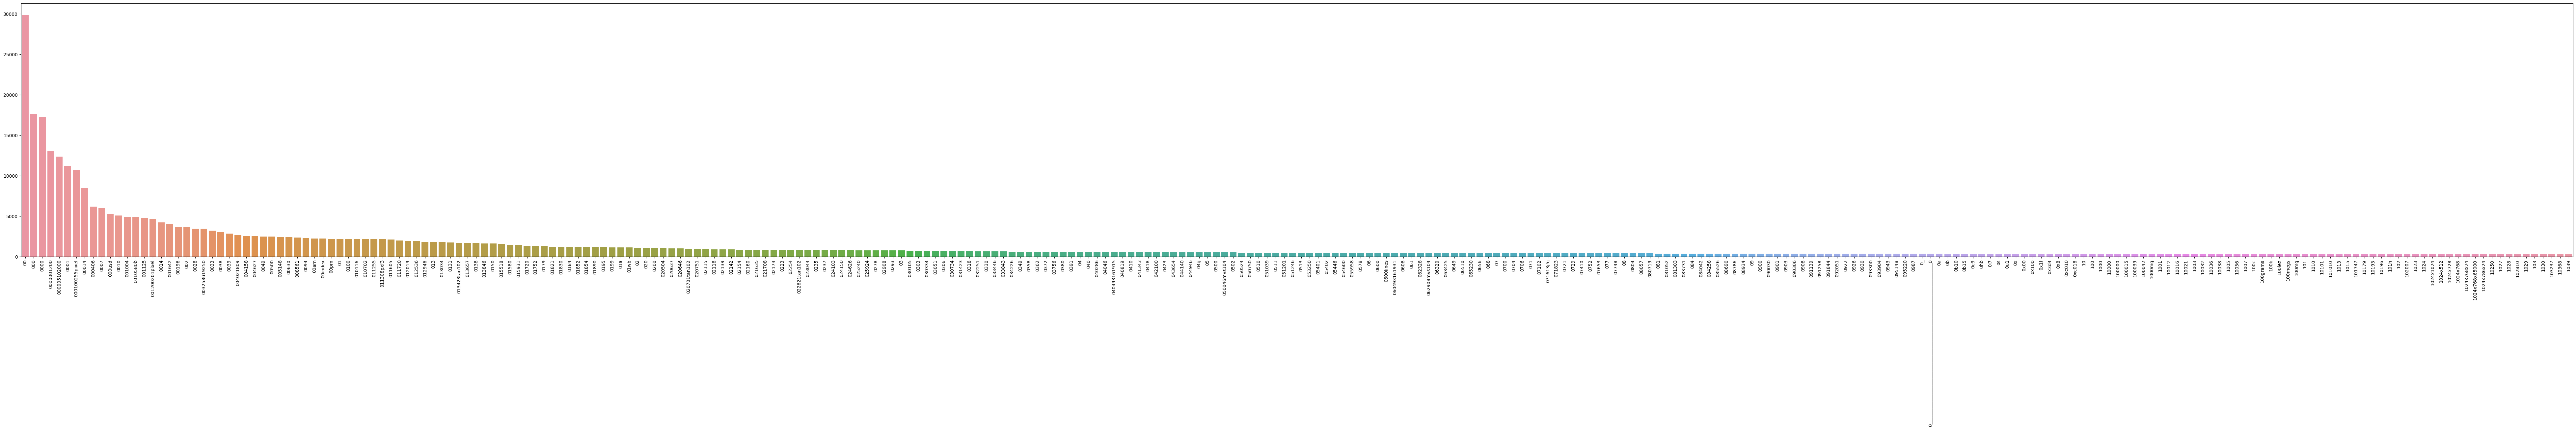

In [204]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=names[:300], 
            y=sorted_term_freq[:300])
g.set_xticklabels(names[:300], rotation = 90)
pass

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [205]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# Yes it works,and since "category" is generated by "category_name", if the creating logic is same, the output is same just as showed below.

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


## Part2

##### Readfile and convert into pandas data frame

In [206]:
#read file
import os
data_path = "./sentiment labelled sentences"
sentences = []
for fname in os.listdir(data_path):
    with open(os.path.join(data_path ,fname), 'r', encoding="utf-8") as f:
        for line in f:
            sentences.append(line.rstrip().split("\t"))

#create pandas dataframe
df_sentences = pd.DataFrame(sentences, columns=['sentence', 'score'])

### 4.1 Missing Values

In [207]:
df_sentences.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [208]:
df_sentences.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [209]:
dummy_series = pd.Series(["dummy_record", None], index=['sentence', 'score'])

In [210]:
dummy_series

sentence    dummy_record
score               None
dtype: object

In [211]:
dummy_series.to_frame().T

,sentence,score
0,dummy_record,None


In [212]:
result_with_series = pd.concat([df_sentences, dummy_series.to_frame().T], ignore_index=True)

In [213]:
len(result_with_series)

3001

In [214]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [215]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': None
              }]

In [216]:
df_sentences = pd.concat([df_sentences, pd.DataFrame(dummy_dict)], ignore_index=True)

In [217]:
len(df_sentences)

3001

In [218]:
df_sentences.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [219]:
df_sentences.dropna(inplace=True)

In [220]:
df_sentences.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [221]:
len(df_sentences)

3000

### 4.2 Dealing with Duplicate Data

In [222]:
df_sentences.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [223]:
sum(df_sentences.duplicated())

17

In [224]:
sum(df_sentences.duplicated('sentence'))

17

In [225]:
df_sentences.drop_duplicates(keep='first', inplace=True)

In [226]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                        }]

In [227]:
df_sentences = pd.concat([df_sentences, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [228]:
len(df_sentences)

2985

In [229]:
sum(df_sentences.duplicated('sentence'))

1

In [230]:
df_sentences.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [231]:
len(df_sentences)

2983

### 5.1 Sampling

In [232]:
sample_sentences = df_sentences.sample(n=1000) #random state

In [233]:
len(sample_sentences)

1000

In [234]:
sample_sentences[0:4]

,sentence,score
2819,They were excellent.,1
1328,Glad I didn't pay to see it.,0
1396,I couldn't take them seriously.,0
1875,Avoid this film at all costs.,0


0    1493
1    1490
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

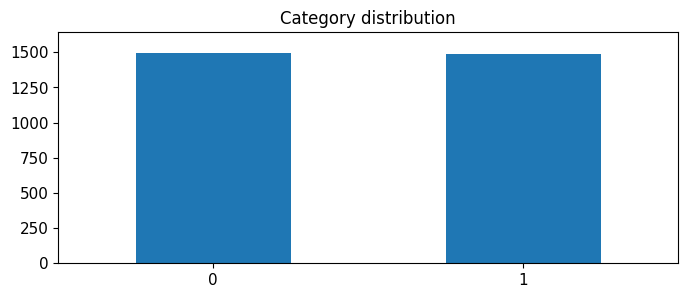

In [235]:
print(df_sentences.score.value_counts())

# plot barchart for X
df_sentences.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(df_sentences.score.value_counts().values) * 1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    519
0    481
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

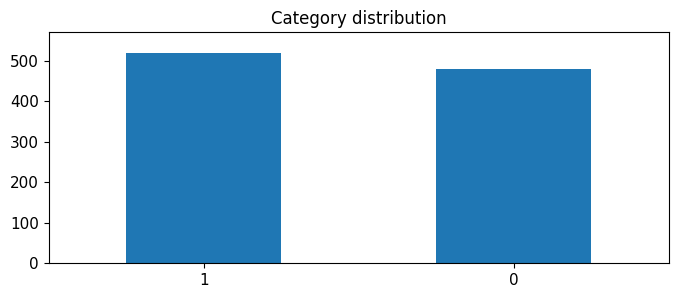

In [236]:
print(sample_sentences.score.value_counts())

# plot barchart for X
sample_sentences.score.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(sample_sentences.score.value_counts().values) * 1.1],        
                                           rot = 0, fontsize = 11, figsize = (8,3))

### 5.2 Feature Creation

In [237]:
# takes a like a minute or two to process
df_sentences['unigrams'] = df_sentences['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [238]:
df_sentences[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [239]:
df_sentences[0:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [240]:
list(df_sentences[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [241]:
count_vect2 = CountVectorizer()
sentences_count = count_vect2.fit_transform(df_sentences['sentence']) #learn the vocabulary and return document-term matrix
print(sentences_count.shape)

(2983, 5155)


In [242]:
analyze = count_vect2.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [243]:
count_vect2.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [244]:
sentences_count[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [245]:
count_vect2.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [246]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect2.get_feature_names_out()[0:20]]

In [247]:
plot_y = ["doc_"+ str(i) for i in list(df_sentences.index)[0:20]]

In [248]:
plot_z = sentences_count[0:20, 0:20].toarray()

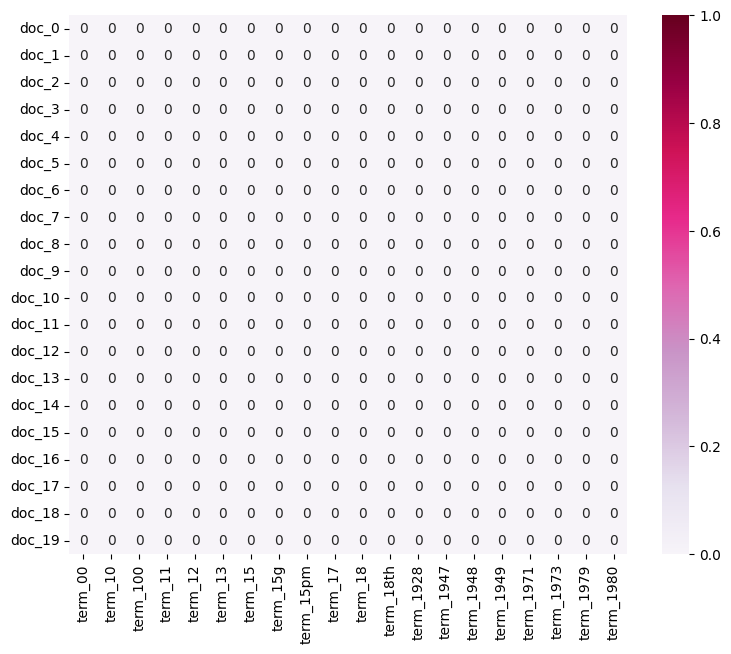

In [249]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [250]:
reduced_sentences_count = PCA(n_components = 2).fit_transform(sentences_count.toarray())

In [251]:
reduced_sentences_count.shape

(2983, 2)

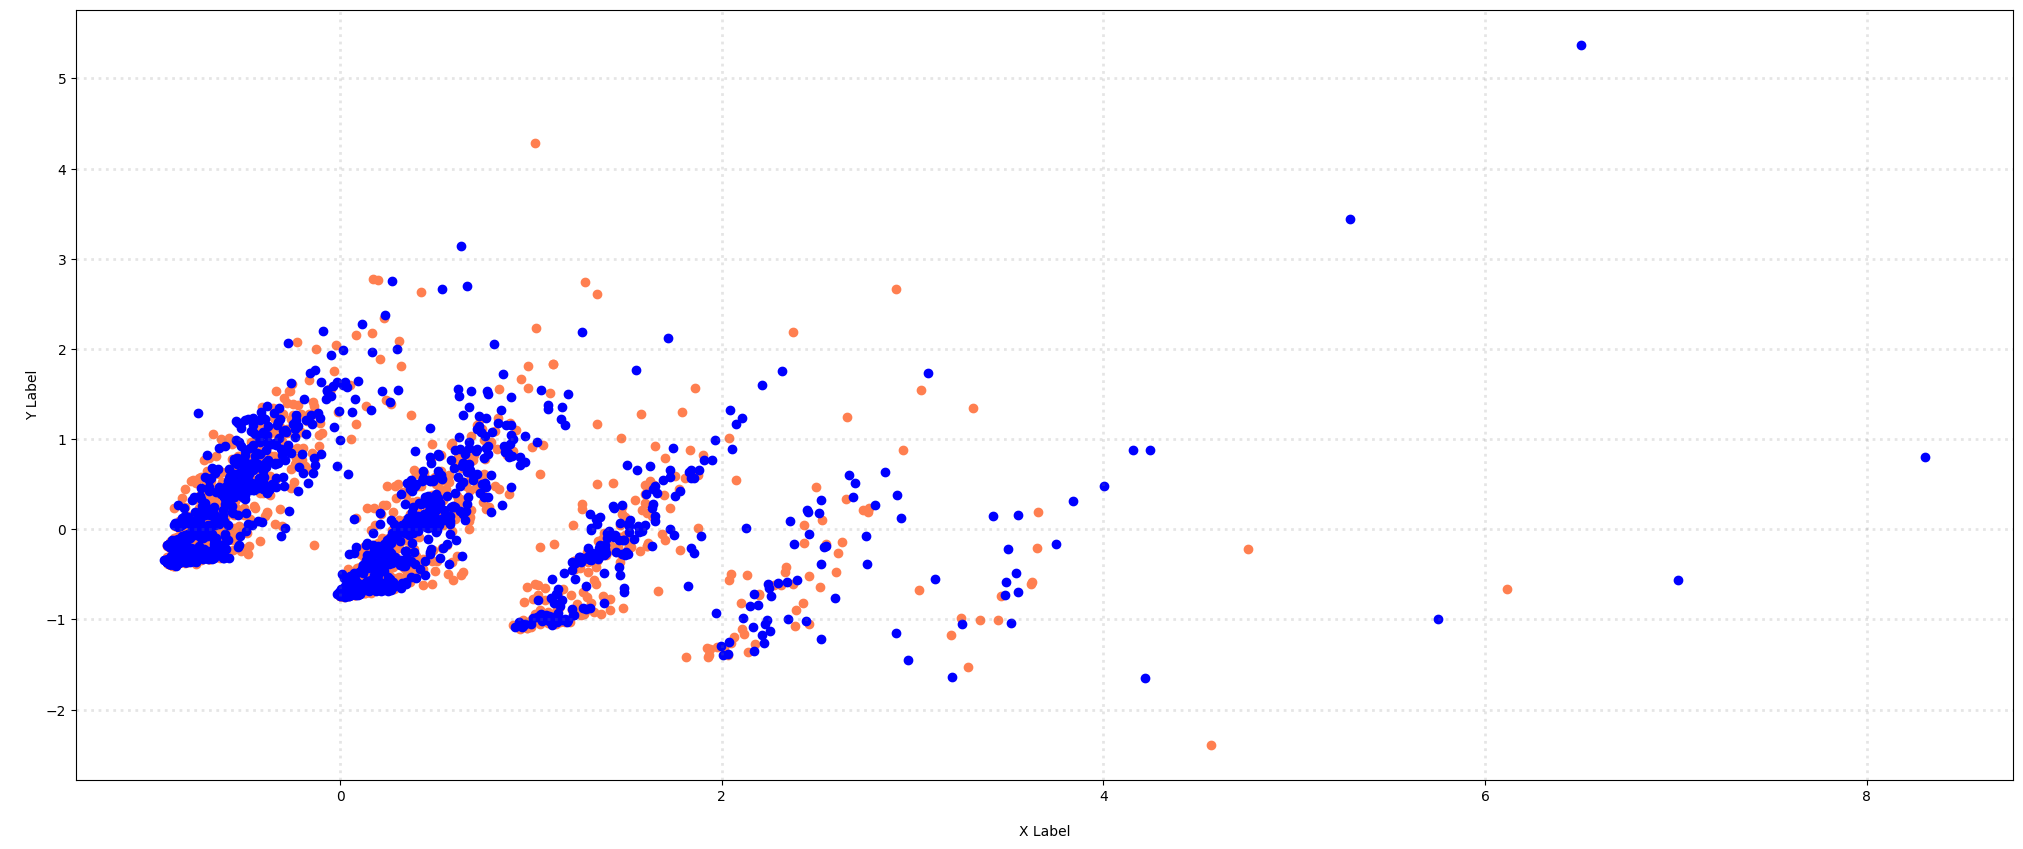

In [252]:
color = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(color, ['0', '1']):
    xs = reduced_sentences_count[df_sentences['score'] == score].T[0]
    ys = reduced_sentences_count[df_sentences['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [253]:
term_frequencies2 = []
for j in range(0,sentences_count.shape[1]):
    term_frequencies2.append(sum(sentences_count[:,j].toarray()))

In [254]:
term_frequencies2 = np.asarray(X_counts.sum(axis=0))[0]

In [255]:
term_frequencies2[:10]

array([134,  92,   1,   2,   1,   3,   1,   1,   1,   1], dtype=int64)

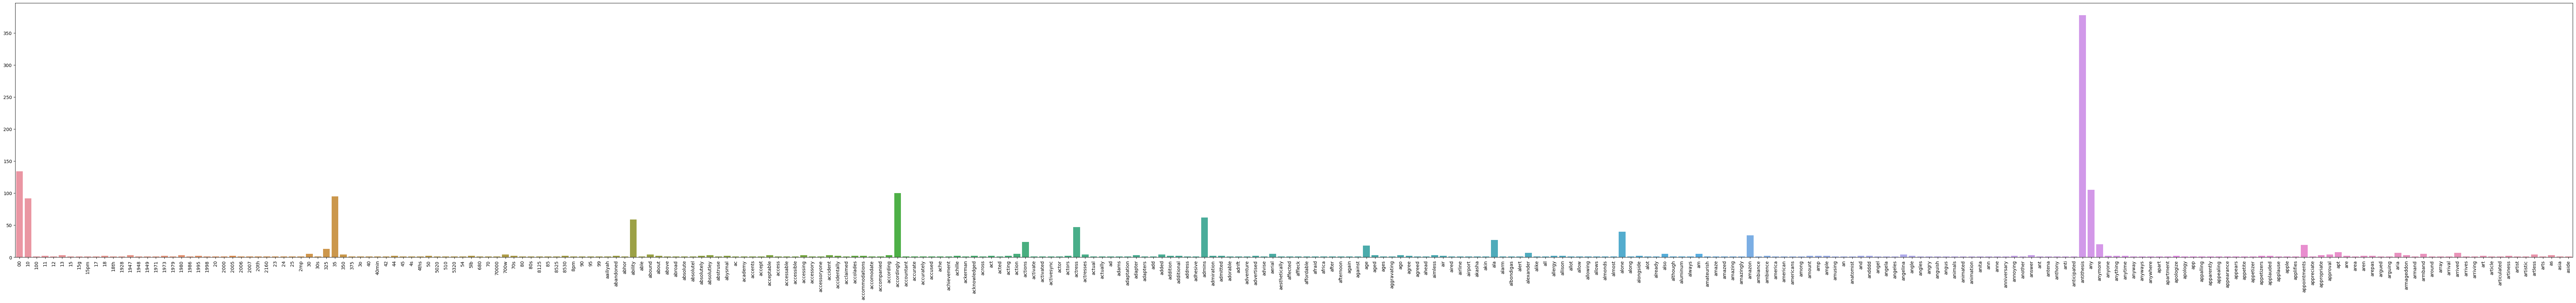

In [256]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect2.get_feature_names_out()[:300], 
            y=term_frequencies2[:300])
g.set_xticklabels(count_vect2.get_feature_names_out()[:300], rotation = 90);

In [257]:
term_frequencies_log2 = np.log(term_frequencies2)

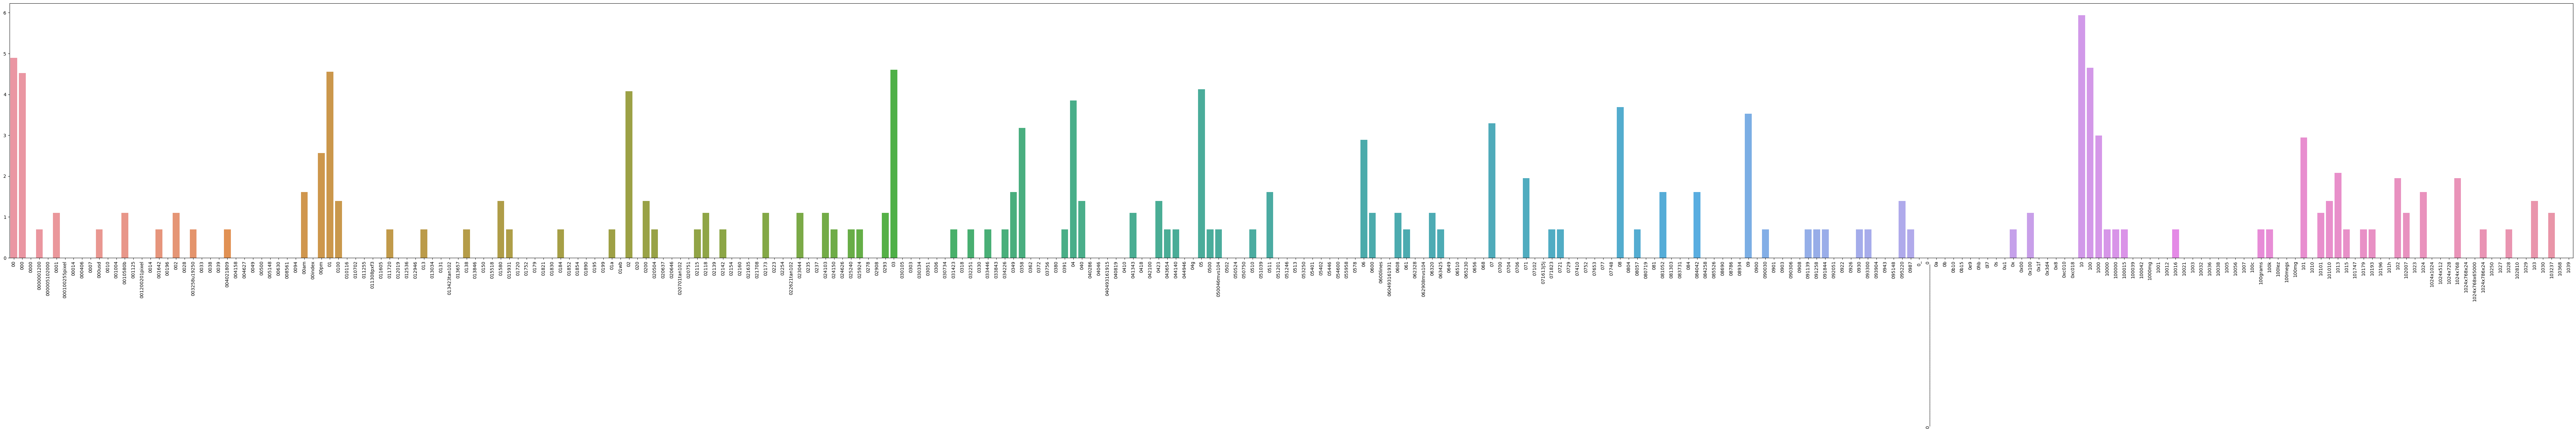

In [258]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log2[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [259]:
mlb2 = preprocessing.LabelBinarizer()

In [260]:
mlb2.fit(df_sentences.score)

LabelBinarizer()

In [261]:
df_sentences['bin_score'] = mlb2.transform(df_sentences['score']).tolist()

In [262]:
df_sentences[0:9]

,sentence,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


### 6. Data Exploration

In [263]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df_sentences.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_sentences.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_sentences.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [264]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [265]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect2.transform(document_to_transform_1)
document_vector_count_2 = count_vect2.transform(document_to_transform_2)
document_vector_count_3 = count_vect2.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [266]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Part3

##### Data visualization

In [267]:
#Visualize with terms frequencies
arr = sentences_count.toarray()
rowsums = []
colsums = [0] * arr.shape[1]

for i in range(arr.shape[0]):
    n = 0
    for j in range(arr.shape[1]):
        n += arr[i][j]
        colsums[j] += arr[i][j]
            
    rowsums.append(n)
    
colsums_with_index = sorted([[index, freq] for index, freq in enumerate(colsums)], key = lambda x: x[1], reverse=True)
rowsums_with_index = sorted([[index, numTerms] for index, numTerms in enumerate(rowsums)], key = lambda x: x[1], reverse=True)

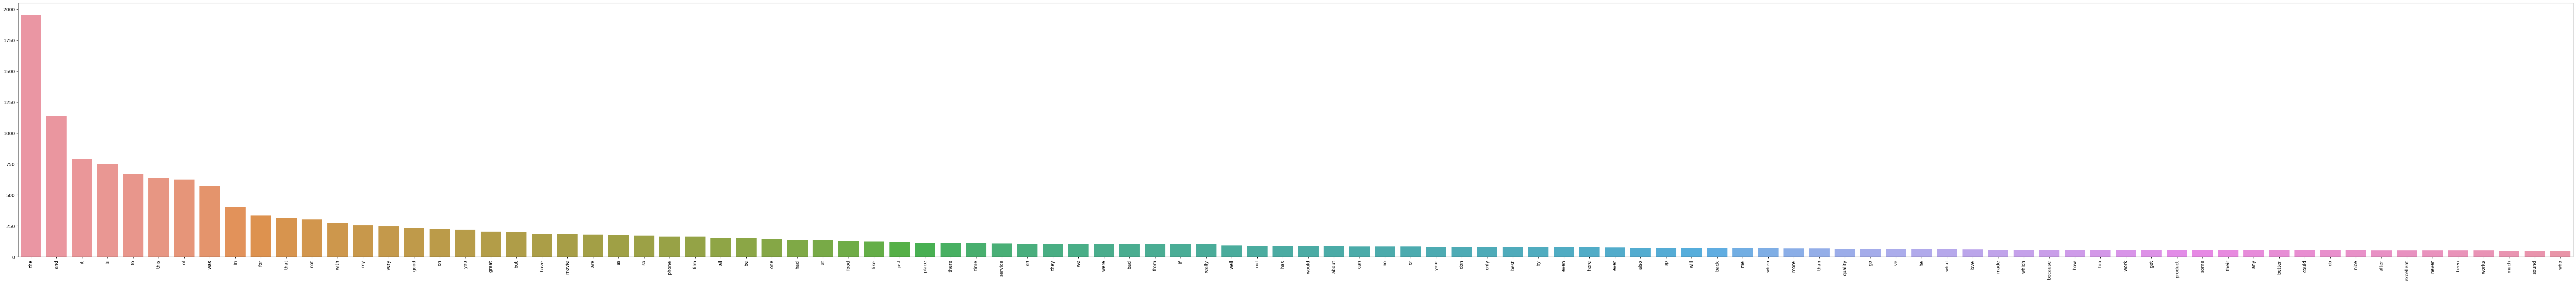

In [268]:
terms = count_vect2.get_feature_names_out()
sorted_term_freq = np.array([x[1] for x in colsums_with_index])
names = np.array([terms[x[0]] for x in colsums_with_index])
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=names[:100], 
            y=sorted_term_freq[:100])
g.set_xticklabels(names[:100], rotation = 90)
pass

        another visualization is showed after processing section TF-TDF

##### TF-IDF

In [269]:
tfs = []
for i in range(sentences_count.shape[0]):
    tf = []
    _, indexs = sentences_count[i].nonzero()
    numWords = len(indexs)
    for ind in indexs:
        tf.append([ind, sentences_count[i][0, ind] / numWords])
    tfs.append(tf)

In [270]:
idfs = []
n = sentences_count.shape[1]
for i in range(n):
    #print(sentences_count.getcol(i).nonzero()[0].size)
    idfs.append(np.log(n / (1 + sentences_count.getcol(i).nonzero()[0].size)))

In [271]:
tf_idf = []
tf_idf_indexKeeped = []
terms = count_vect2.get_feature_names_out()
tf_idf_mtx = sentences_count.copy().toarray().astype(np.float64)
for i in range(len(tfs)):
    temp = []
    for ind, freq in tfs[i]:
        score = idfs[ind] * freq
        tf_idf_mtx[i, ind] = score
        temp.append([ind, score])
    temp.sort(key = lambda x: x[1], reverse = True)
    tf_idf_indexKeeped.append(temp)
 
for score in tf_idf_indexKeeped:
    toWord = [[terms[x[0]], x[1]] for x in score]
    tf_idf.append(toWord)

In [272]:
df_tf_idf = pd.DataFrame(tf_idf_mtx.T, index = terms, columns = df_sentences['sentence'])
df_tf_idf

sentence,So there is no way for me to plug it in here in the US unless I go by a converter.,"Good case, Excellent value.",Great for the jawbone.,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,The mic is great.,I have to jiggle the plug to get it to line up right to get decent volume.,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",If you are Razr owner...you must have this!,"Needless to say, I wasted my money.",What a waste of money and time!.,...,The refried beans that came with my meal were dried out and crusty and the food was bland.,Spend your money and time some place else.,A lady at the table next to us found a live green caterpillar In her salad.,the presentation of the food was awful.,I can't tell you how disappointed I was.,I think food should have flavor and texture and both were lacking.,Appetite instantly gone.,Overall I was not impressed and would not go back.,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.","Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z500a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zillion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
df_sentences['tf_idf'] = tf_idf
df_sentences

,sentence,score,unigrams,bin_score,tf_idf
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[[converter, 0.4363652897717286], [unless, 0.3..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1],"[[value, 1.5876244547787102], [case, 1.2628037..."
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1],"[[jawbone, 1.7903570088327925], [great, 0.8174..."
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0],"[[tied, 0.6545479346575929], [conversations, 0..."
4,The mic is great.,1,"[The, mic, is, great, .]",[1],"[[mic, 1.73457112100424], [great, 0.8174019343..."
...,...,...,...,...,...
2978,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...",[0],"[[texture, 0.716142803533117], [lacking, 0.660..."
2979,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]",[0],"[[appetite, 2.6181917386303715], [instantly, 2..."
2980,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...",[0],"[[not, 0.7203239270846571], [overall, 0.700410..."
2981,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...",[0],"[[ninja, 0.4909109509931947], [underwhelming, ..."


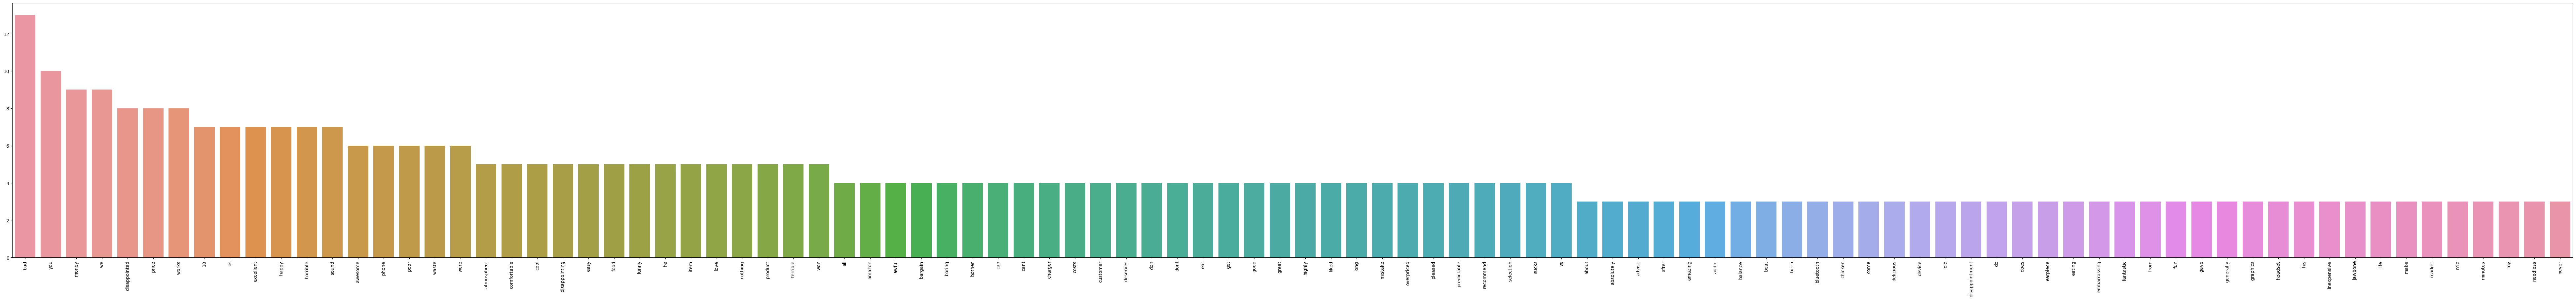

In [274]:
#Visualize with tf-idf score, every top-1 tf-idf score term in each text will get 1 point
importance = [[i, 0] for i in range(terms.shape[0])]
for score in tf_idf_indexKeeped:
    index, _ = score[0]
    importance[index][1] += 1
importance.sort(key = lambda x:x[1], reverse = True)

names = np.array([terms[x[0]] for x in importance])
importance = np.array([x[1] for x in importance])
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=names[:100], 
            y=importance[:100])
g.set_xticklabels(names[:100], rotation = 90)
pass

##### Naive Bayes Classifier

In [275]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
Y = df_sentences['score'].values

In [276]:
#Use term frequency as feature to train naive-bayes classifier
X1 = sentences_count.toarray() 
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2)
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB()

In [277]:
predictResult = bnb.predict(X_test)
total = predictResult.shape[0]
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(total):
    if predictResult[i] == '1':
        if Y_test[i] == '1':
            tp += 1
        else:
            fp += 1
    else:
        if Y_test[i] == '0':
            tn += 1
        else:
            fn += 1
accuracy = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = 2 * (precision + recall) / (precision * recall)
print("accuracy: {:.3f},precision: {:.3f},recall: {:.3f},f-score: {:.3f}".format(accuracy, precision, recall, f_score))

accuracy: 0.826,precision: 0.804,recall: 0.827,f-score: 4.904


In [278]:
#Use tf-idf as feature to train naive-bayes classifier
X2 = tf_idf_mtx
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB()

In [279]:
predictResult = mnb.predict(X_test)
total = predictResult.shape[0]
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(total):
    if predictResult[i] == '1':
        if Y_test[i] == '1':
            tp += 1
        else:
            fp += 1
    else:
        if Y_test[i] == '0':
            tn += 1
        else:
            fn += 1
accuracy = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = 2 * (precision + recall) / (precision * recall)
print("accuracy: {:.3f},precision: {:.3f},recall: {:.3f},f-score: {:.3f}".format(accuracy, precision, recall, f_score))

accuracy: 0.829,precision: 0.817,recall: 0.839,f-score: 4.833


## Part4


In [ ]:
"""
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
"""
#這部分的code運行上會較慢一些，因為X_counts[:,j]會先複製一份該段而不是直接讀取後進行toarray，因此使用時間約會是將整個X_counts.toarray()後再計算column sums的兩倍